In [14]:
from openforcefield.topology import Molecule
import qcengine
from qcelemental.models import AtomicInput
from qcelemental.models.common_models import Model
from openeye import oequacpac, oechem

In [99]:
# for adaptation to script, loop this variable over a file
sm_mol = "CCO"

In [100]:
# make a off toolkit molecule
molecule = Molecule.from_smiles(sm_mol)
molecule.generate_conformers()
molecule

NGLWidget()

In [101]:
# make qcelemental molecule to use with qcenging - for xtb
qc_mol = molecule.to_qcschema()

In [106]:
# create an xtb model for the program
xtb_model = Model(method="gfn2-xtb", basis=None)
qc_task = AtomicInput(molecule=qc_mol, driver="energy", model=xtb_model)

# compute and display output
result = qcengine.compute(input_data=qc_task, program="xtb")

result.dict()["properties"]["return_energy"]

-11.39127870084584

In [104]:
# make openeye molecule to use with openeye - for am1
oe_mol = molecule.to_openeye()

In [67]:
calc = oequacpac.OEAM1()
result = oequacpac.OEAM1Results()
calc.CalcAM1(result, oe_mol)

calc.GetResults(result)
result.GetEnergy()

-16.067719120616857

In [80]:
def get_xtb(mol):
    qc_mol = mol.to_qcschema()

    xtb_model = Model(method="gfn2-xtb", basis=None)
    qc_task = AtomicInput(molecule=qc_mol, driver="energy", model=xtb_model)

    result = qcengine.compute(input_data=qc_task, program="xtb")
    return result.dict()["properties"]["return_energy"]


def get_am1(mol):
    oe_mol = mol.to_openeye()
    calc = oequacpac.OEAM1()
    result = oequacpac.OEAM1Results()
    calc.CalcAM1(result, oe_mol)

    return result.GetEnergy()

def getEnergies(sm_mol : str) -> ("xtb energy", "am1 energy"):
    molecule = 0
    
    try:
        molecule = Molecule.from_smiles(sm_mol, allow_undefined_stereo=True)
        molecule.generate_conformers()
    except Exception:
        return (None, None)
    
    return (get_xtb(molecule), get_am1(molecule))
    

In [69]:
import matplotlib.pyplot as plt

In [107]:
filename = "version.smi"
mols = []
xtb_en = []
am1_en = []
data = {}

number = 50 #float("inf") # for every line
cnt = 0

with open(filename) as inputs:
    for line in inputs:
        if cnt >= number:
            break
        
        sm_mol, v_id, p_id = line.split()
        
        if sm_mol == "isosmiles":
            continue
            
        mols.append(sm_mol)
        _xtb, _am1 = getEnergies(sm_mol)
        xtb_en.append(_xtb)
        am1_en.append(_am1)
        data[sm_mol] = {"xtb": _xtb, "am1": _am1}
        
        if cnt % 10 == 0:
            print("finished:", cnt)
        
        cnt += 1

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 6, name: , idx: 10, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 8, name: , idx: 9, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 29, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 11, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 1, name: , idx: 54, aromatic: False, chiral: False
Atom atomic num: 6, name: , idx: 15, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: True
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 25, aromatic: False, chiral: True
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 16, aromatic: False, chiral: False
bond or

finished: 0


Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 6, name: , idx: 21, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 20, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 17, name: , idx: 22, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 23, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 1, name: , idx: 58, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 12, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx:

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 6, name: , idx: 11, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 8, name: , idx: 10, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 30, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 12, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 1, name: , idx: 57, aromatic: False, chiral: False
Atom atomic num: 6, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 14, aromatic: False, chiral: True
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 26, aromatic: False, chiral: True
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: False, chiral: False
bond o

finished: 10


Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 6, name: , idx: 6, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 5, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 7, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 19, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 1, name: , idx: 34, aromatic: False, chiral: False
Problematic bonds are: [<openeye.oechem.OEBondBase; proxy of <Swig Object of type 'OEChem::OEBondBase *' at 0x7fa55f674060> >]

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 6, name: , idx: 1, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic

finished: 20


Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic bonds are: [<openeye.oechem.OEBondBase; proxy of <Swig Object of type 'OEChem::OEBondBase *' at 0x7fa55f67d1e0> >]



finished: 30


Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 6, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 10, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 12, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 1, name: , idx: 23, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 6, name: , idx: 9, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 6, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 10, ar

finished: 40


Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 6, name: , idx: 11, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 8, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 12, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 1, name: , idx: 29, aromatic: False, chiral: False



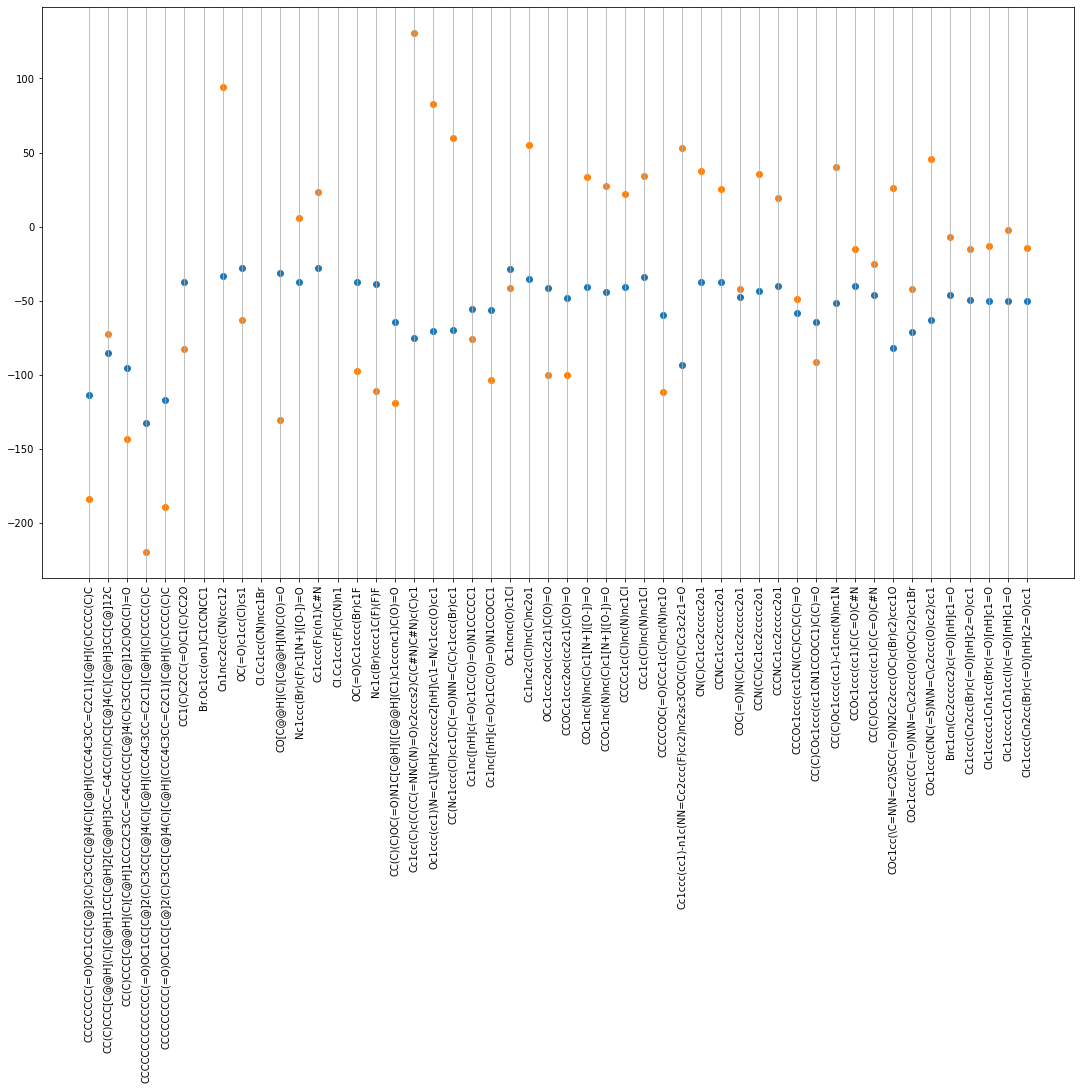

In [108]:
plt.scatter(mols, xtb_en)
plt.scatter(mols, am1_en)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.grid(axis="x")
plt.show()

In [109]:
# pickle the data
import pickle
with open('xtb_am1_benchmark.pickle', 'wb') as pkfile:
    pickle.dump(data, pkfile)

In [111]:
#with open('xtb_am1_benchmark.pickle', 'rb') as handle:
#    b = pickle.load(handle)
#    print(b)